<a href="https://colab.research.google.com/github/MartaPCastillo/Simulacion-I/blob/main/Experimento_Aguja_de_Buffon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experimento de la Aguja de Buffon

La aguja de Buffon es un clásico problema de probabilidad geométrica, de realización práctica y cuyo interés radica en que es un método fácil para ir aproximando el valor del número π a partir de sucesivos intentos. Fue planteado por el naturalista francés Buffon en 1733 y reproducido por él mismo ya resuelto en 1777.

Este experimento consiste en dejar caer una aguja sobre una hoja rayada y anotar las veces que la aguja cruza alguna de las rayas. Después de lanzar la aguja muchísimas veces comprobó que su experimento estaba íntimamente relacionado con el número $\pi$. Para obtener un número muy parecido a $\pi$, hay que dejar caer la aguja muchísimas veces sobre la hoja, multiplicar esta cantidad por dos y dividir el resultado entre el número de veces que la aguja cruzó alguna de las rayas.

El planteamiento matemático de este problema es:

Sea una aguja de longitud $\ell$ lanzada sobre un plano segmentado por líneas paralelas separadas $t$ unidades. ¿Cuál es la probabilidad que la aguja cruce alguna línea?.

### 1. Identifique las variables

Tenemos:

$x$ la distancia entre el centro de la aguja y la línea más cercana, $x \in [0,t/2]$, y

$\theta$ el ángulo entre la aguja y las líneas, $\theta \in [0,\pi /2]$.

También es importante hacer ver que esta solución es para el caso cuando $t\geq \ell$ (las agujas miden menos que la distancia entre las líneas).

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

La variable aleatoria $x$ se distribuye uniformemente (de forma continua) entre el 0 y $\dfrac{t}{2}$, por lo que su función de densidad de probabilidad es:

$f_X(x)= \dfrac{2}{t} dx$

Por su parte, la variable aleatoria $\theta$, al igual que $x$ se distribuye uniformemente entre 0 y $\dfrac{\pi}{2}$, por lo que su función de densidad de probabilidad es:

$f_\Theta(\theta)= \dfrac{2}{\pi} d\theta$

Al $x$ y $\theta$ ser variables aleatorias independientes, la función conjunta de densidad es simplemente el producto de ambas:

$f_{X,\Theta }(x,\theta )={\frac {4}{t\pi }}\,dx\,d\theta$

### 4. Defina el modelo del sistema y los objetivos de la simulación

La condición para que una aguja cruce una línea es: $x\leq {\frac {\ell }{2}}\,\sin \theta$

Ahora se busca la función de probabilidad de este problema, la cual se obtiene integrando para ambas variables la función de densidad, lo cual es:

$\int _{\theta =0}^{\frac {\pi }{2}}\int _{x=0}^{(\ell /2)\sin \theta }{\frac {4}{t\pi }}\,dx\,d\theta ={\frac {2\ell }{t\pi }}$

Si se lanzan $n$ agujas y $h$ cruzan alguna línea, se tiene que:

${\frac {h}{n}}\approx {\frac {2\ell }{t\pi }}$


De donde despejando $\pi$, tenemos:

$\pi \approx {\frac {2n\ell }{ht}}$

###Simulación

In [ ]:
import numpy as np
import random as rnd
import math
import matplotlib.pyplot as plt

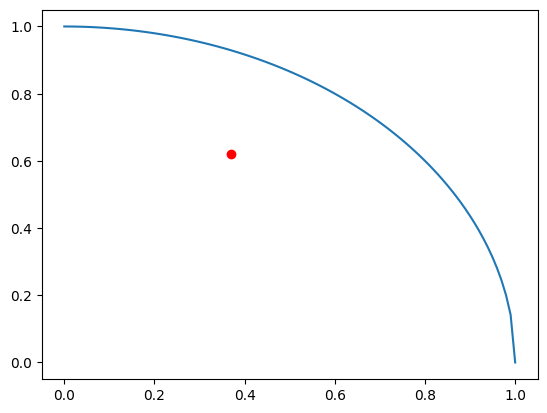

In [ ]:
#Este es el experimento
x = np.linspace(0,1,100)
u_1 = rnd.random()
u_2 = rnd.random()
plt.plot(x, np.sqrt(1-x**2))
plt.scatter(u_1,u_2,color="red")
plt.show()

In [ ]:
def estimacion(N):
    exitos = 0
    lista = []

    for i in range(N):
        u_1 = rnd.uniform(0,1)
        u_2 = rnd.uniform(0,1)

        if u_2 <= np.sqrt(1-u_1**2):
            exitos += 1

        prob=exitos/(i+1)
        lista.append(4*prob)
    return lista

Nota:

Ponemos "4*prob" ya que teníamos que $\dfrac{A_{circulo}}{A_{cuadrado}} = \dfrac{n}{N}$, luego teníamos que $\pi \approx 4 \cdot \dfrac{n}{N}$.

Dónde:

n = número de éxitos.

N = total de experimentos o estimaciones.

In [ ]:
G = estimacion(1000)
print(G)

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.6363636363636362, 3.6666666666666665, 3.6923076923076925, 3.7142857142857144, 3.7333333333333334, 3.75, 3.764705882352941, 3.5555555555555554, 3.5789473684210527, 3.6, 3.619047619047619, 3.6363636363636362, 3.4782608695652173, 3.5, 3.52, 3.5384615384615383, 3.5555555555555554, 3.4285714285714284, 3.4482758620689653, 3.466666666666667, 3.4838709677419355, 3.5, 3.515151515151515, 3.411764705882353, 3.4285714285714284, 3.4444444444444446, 3.4594594594594597, 3.473684210526316, 3.4871794871794872, 3.5, 3.5121951219512195, 3.5238095238095237, 3.5348837209302326, 3.5454545454545454, 3.5555555555555554, 3.5652173913043477, 3.574468085106383, 3.5833333333333335, 3.5918367346938775, 3.6, 3.607843137254902, 3.6153846153846154, 3.6226415094339623, 3.6296296296296298, 3.5636363636363635, 3.5714285714285716, 3.5789473684210527, 3.586206896551724, 3.593220338983051, 3.533333333333333, 3.540983606557377, 3.5483870967741935, 3.492063492063492, 3.5, 

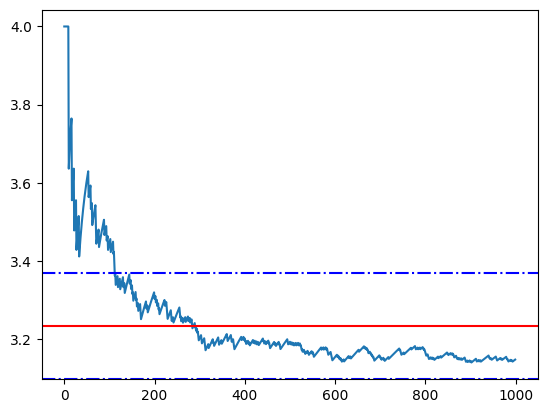

In [ ]:
plt.plot(G)
plt.axhline(y=media, color='r', linestyle='-')
plt.axhline(y=media + desv_est, color='b', linestyle='dashdot')
plt.axhline(y=media - desv_est, color='b', linestyle = "dashdot")

Se ve que una muestra de tamaño N $\approx$ 500 da un resultado aceptable.

Calculamos la media y la varianza de la estimación.

In [ ]:
media = np.mean(G)
varianza = np.var(G)
desv_est = np.std(G)

In [ ]:
print(media)
print(varianza)
print(desv_est)

3.2346802798706413
0.018472732016022925
0.13591442902070008


Se tiene que correr de nuevo la gráfica, después de haber calculado la media, varianza y desviación estándar, para que nos grafique bien nuestras líneas.

Ahora, con eso podemos modificar la función y convertirla en una corrida de la simulación: lista $\longrightarrow$ lista[-1] y fijamos N=500 (por ejemplo).

In [ ]:
def simulacion(M):
    r = []

    for i in range(M):
        R=estimacion(500)
        r.append(R)

    return r

In [ ]:
H=simulacion(10000)
print(H)

[3.168, 2.936, 3.248, 3.184, 3.152, 3.176, 3.168, 3.04, 3.152, 3.192, 3.192, 3.208, 3.184, 3.032, 3.096, 3.16, 3.096, 3.096, 3.104, 3.192, 3.192, 3.248, 3.104, 3.184, 3.136, 3.168, 3.016, 3.232, 3.144, 3.152, 3.096, 3.152, 3.112, 3.12, 3.064, 3.16, 3.208, 3.208, 3.264, 3.184, 3.008, 3.216, 3.24, 3.216, 3.112, 3.0, 3.024, 3.096, 3.248, 3.248, 3.24, 3.12, 3.16, 3.112, 3.232, 3.28, 3.128, 3.064, 3.112, 3.136, 3.04, 3.136, 3.16, 3.088, 3.136, 3.12, 3.096, 3.024, 3.144, 3.08, 2.984, 3.08, 3.232, 3.072, 3.176, 3.072, 3.12, 3.112, 3.304, 3.192, 3.264, 3.208, 3.128, 3.112, 3.08, 3.072, 3.128, 3.072, 3.168, 3.096, 3.184, 3.136, 3.168, 3.32, 3.16, 3.176, 3.096, 3.248, 3.104, 3.184, 3.12, 3.144, 3.272, 3.112, 3.232, 3.056, 3.12, 3.136, 3.12, 3.256, 3.008, 3.048, 3.184, 3.12, 3.0, 3.056, 3.104, 3.216, 3.176, 3.032, 3.112, 3.136, 3.128, 3.064, 3.136, 3.256, 3.288, 2.968, 3.048, 3.2, 3.112, 3.176, 3.136, 3.112, 3.112, 3.184, 3.144, 3.136, 3.088, 3.272, 3.24, 3.16, 3.016, 3.216, 3.152, 3.048, 3.088, 

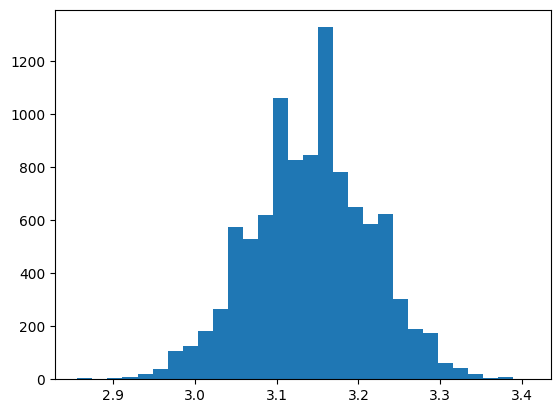

In [ ]:
plt.hist(H, bins=30)
plt.show()

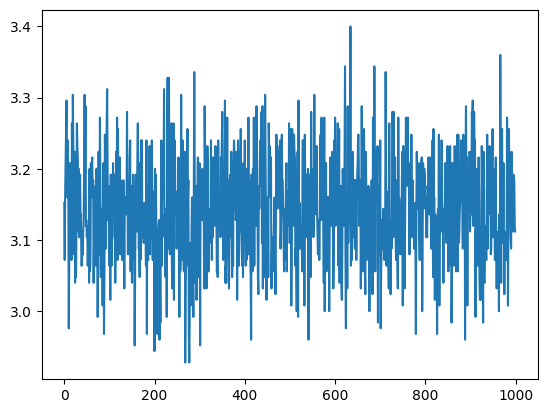

In [ ]:
plt.plot(H)